<a href="https://colab.research.google.com/github/SwathiMenon/Machine_learning/blob/main/gender_classification_using_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
#IMPORTING THE FILE
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/datasets/gender_classification_v7.xls")
df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


In [22]:
#CHECKING FOR MISSING VALUES
df.isna().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

In [23]:
#FINDING THE TYPES
df.dtypes

long_hair                      int64
forehead_width_cm            float64
forehead_height_cm           float64
nose_wide                      int64
nose_long                      int64
lips_thin                      int64
distance_nose_to_lip_long      int64
gender                        object
dtype: object

In [24]:
#CONVERTING TO NUMERIC FORM
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["gender"]=le.fit_transform(df["gender"])

In [25]:
df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,0
4997,1,11.9,5.4,0,0,0,0,0
4998,1,12.9,5.7,0,0,0,0,0
4999,1,13.2,6.2,0,0,0,0,0


In [26]:
#SPLITING DATA 
X=df.iloc[:,:-1]
X

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
0,1,11.8,6.1,1,0,1,1
1,0,14.0,5.4,0,0,1,0
2,0,11.8,6.3,1,1,1,1
3,0,14.4,6.1,0,1,1,1
4,1,13.5,5.9,0,0,0,0
...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0
4997,1,11.9,5.4,0,0,0,0
4998,1,12.9,5.7,0,0,0,0
4999,1,13.2,6.2,0,0,0,0


In [27]:
y=df.iloc[:,-1]
y

0       1
1       0
2       1
3       1
4       0
       ..
4996    0
4997    0
4998    0
4999    0
5000    1
Name: gender, Length: 5001, dtype: int64

In [28]:
#SCALING THE DATA SET UDING MIN MAX SCALER
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
mms.fit(X)
X_sc=mms.transform(X)
X_sc

array([[1.        , 0.09756098, 0.5       , ..., 0.        , 1.        ,
        1.        ],
       [0.        , 0.63414634, 0.15      , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.09756098, 0.6       , ..., 1.        , 1.        ,
        1.        ],
       ...,
       [1.        , 0.36585366, 0.3       , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.43902439, 0.55      , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.97560976, 0.15      , ..., 1.        , 1.        ,
        1.        ]])

In [29]:
#SPLITTING IN TO TEST DATA AND TRAIN DATA
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_sc,y,test_size=.3,random_state=1)


In [30]:
X_test.shape

(1501, 7)

In [31]:
X_train.shape

(3500, 7)

In [32]:
y_train.shape

(3500,)

In [33]:
y_test.shape

(1501,)

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [35]:
#PREDICTING
y_pred=knn.predict(X_test)
y_pred

array([0, 1, 0, ..., 1, 0, 1])

In [36]:
#TESTING THE ACCURACY
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred,y_test)*100)

96.33577614923384


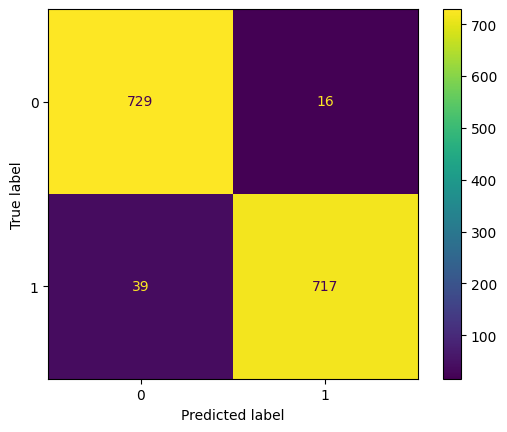

In [37]:
#PLOTTING CONFUSION MATRIX
from sklearn.metrics import ConfusionMatrixDisplay
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

In [38]:
y.value_counts()

0    2501
1    2500
Name: gender, dtype: int64

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       745
           1       0.98      0.95      0.96       756

    accuracy                           0.96      1501
   macro avg       0.96      0.96      0.96      1501
weighted avg       0.96      0.96      0.96      1501



In [40]:
og=knn.predict(mms.transform([[1,12.3,6.0,1,0,0,1]]))
if og==1:
  print("male")
else:
  print("female")

male


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
